In [1]:
from qutip import*
import matplotlib.pyplot as plt
import numpy as np
from qutip.qip.operations import rx, ry, rz

In [15]:
def plot_wigner(dm, x):
    xvec = np.linspace(-x,x, 50)
    yvec = np.linspace(-x,x, 50)
    # Figure settings
    fig, axes = plt.subplots(1,1)
    fig.set_size_inches(10,8)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xlabel(r'Re ($\beta$)', fontsize=20)
    plt.ylabel(r'Im ($\beta$)', fontsize=20)
    #plt.title("Time Evolution", fontsize=20)
    plt.grid()
    # Color bar settings
    wigner0 = wigner(dm, xvec, yvec, g = 2)
    cont0 = axes.contourf(xvec, yvec, wigner0, 200, cmap = 'seismic', norm = plt.Normalize(vmin = -2/np.pi, vmax = 2/np.pi))
    fig.colorbar(cont0)

In [16]:
def gaussian(t, args): 
    return args["amp"] * np.exp(-((t-args["t0"])**2)/(2*args["std"]**2))

In [108]:
# build hamiltonian
N = 150
chi = 2*np.pi*0.045

Ic = qeye(N)
Iq = qeye(2)

a = tensor(Iq,destroy(N))
sz = tensor(sigmaz(),Ic)
vac = tensor(fock(2,0),fock(N,0))
n = a.dag()*a
Rx = tensor(rx(np.pi),Ic)

H_int = -chi/2*a.dag()*a*sz - 1.25e-3*a.dag()**2*a**2*sz
H_drive = lambda epsilon: (1j*epsilon*a.dag() + np.conjugate(1j*epsilon)*a) -chi/2*a.dag()*a*sz

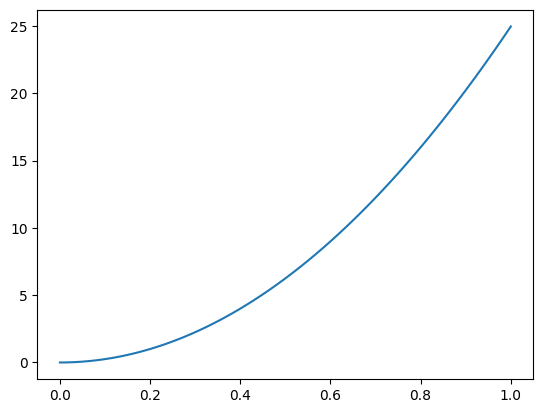

In [109]:
#cablirate drive
t_d_len = 1
t_d = np.linspace(0,t_d_len,100)

t = np.linspace(0,1,100)
e_ops = [n]

results = mesolve(H_drive(5), vac, t ,e_ops = e_ops)
plt.plot(t, results.expect[0])

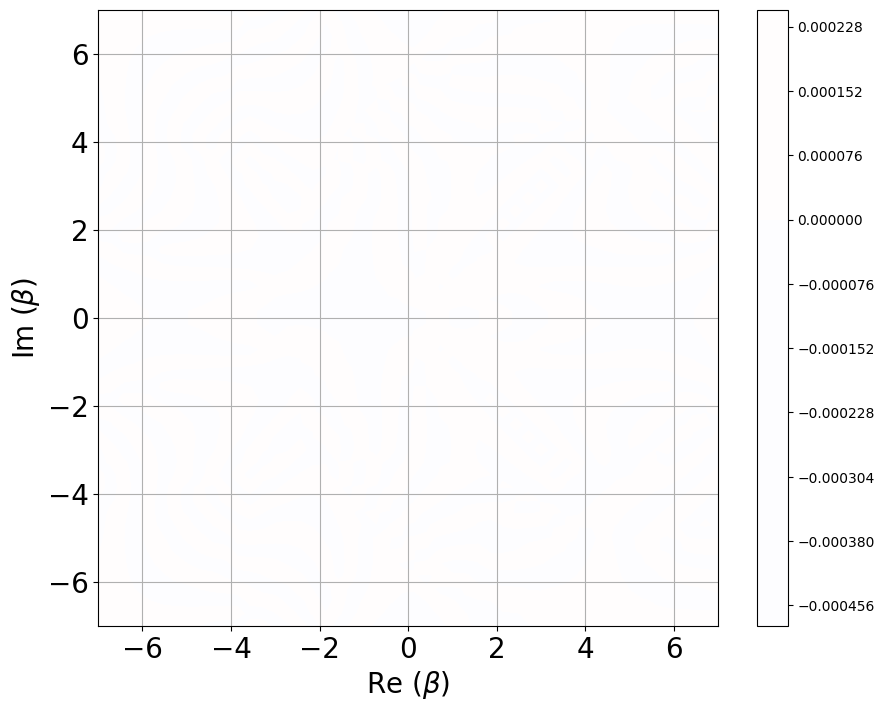

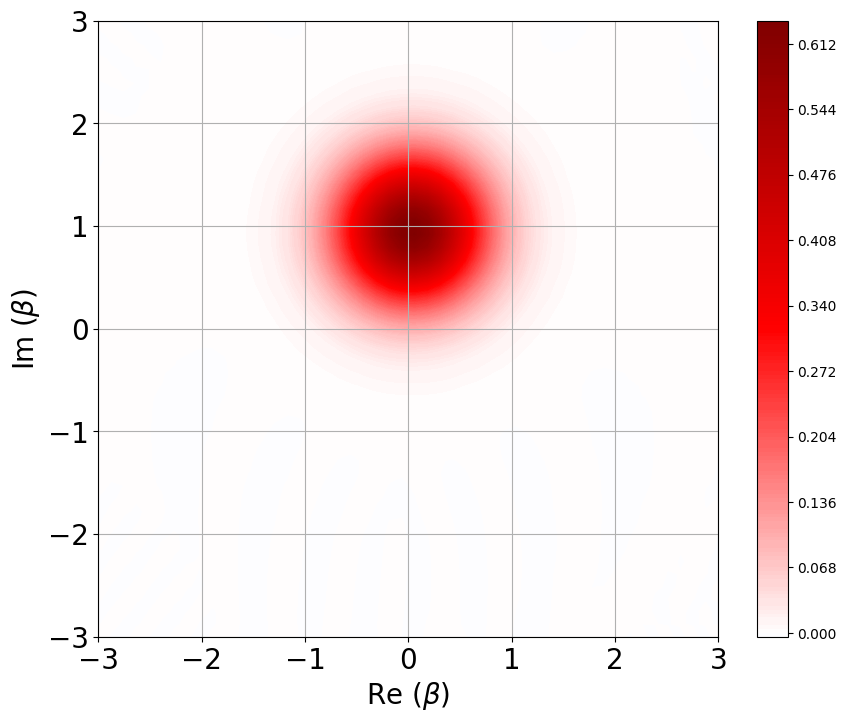

In [110]:

eps = 80
t_d = np.linspace(0,0.124,10)

t_wait = np.linspace(0,0.08,10)

# ECD
# first displacement 

psi1 =  mesolve(H_drive(eps), vac, t_d ).states[-1]
# # first wait
psi2 = mesolve(H_int, psi1, t_wait).states[-1]
# first negative displacement
psi3 =  mesolve(H_drive(-eps), psi2, t_d ).states[-1]
# flip qubit
psi4 = Rx*psi3
# second negative displacement

psi5 =  mesolve(H_drive(-eps), psi4, t_d).states[-1]
# seoncd wait
psi6 = mesolve(H_int, psi5, t_wait).states[-1]
# second positive displacement

psi7 =  mesolve(H_drive(eps), psi6, t_d).states[-1]

plot_wigner(ptrace(psi1,1), 7)
# plot_wigner(ptrace(psi2,1), 3)
# plot_wigner(ptrace(psi3,1), 3)
# plot_wigner(ptrace(psi5,1), 3)
# plot_wigner(ptrace(psi6,1), 3)
plot_wigner(ptrace(psi7,1), 3)


In [111]:
expect(n,psi1)

98.40394849479374